In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

import os

In [149]:
#Reading the data
df = pd.read_csv("train.csv")

#### EDA

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [151]:
df.shape

(1460, 81)

In [152]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [153]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [154]:
null_perc = (df.isnull().sum()/len(df))*100

In [155]:
columns_to_remove = null_perc[null_perc > 45]

In [156]:
columns_to_remove

Alley          93.767123
MasVnrType     59.726027
FireplaceQu    47.260274
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

#### Note:
Below are the columns which have more than 45% null values: [Alley,MasVnrType,FireplaceQu,PoolQC,Fence,MiscFeature]
and It can be removed.

#### Check for outliers

In [157]:
numerical_cols = df.select_dtypes(include=['int64', 'float64'])
numerical_cols.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

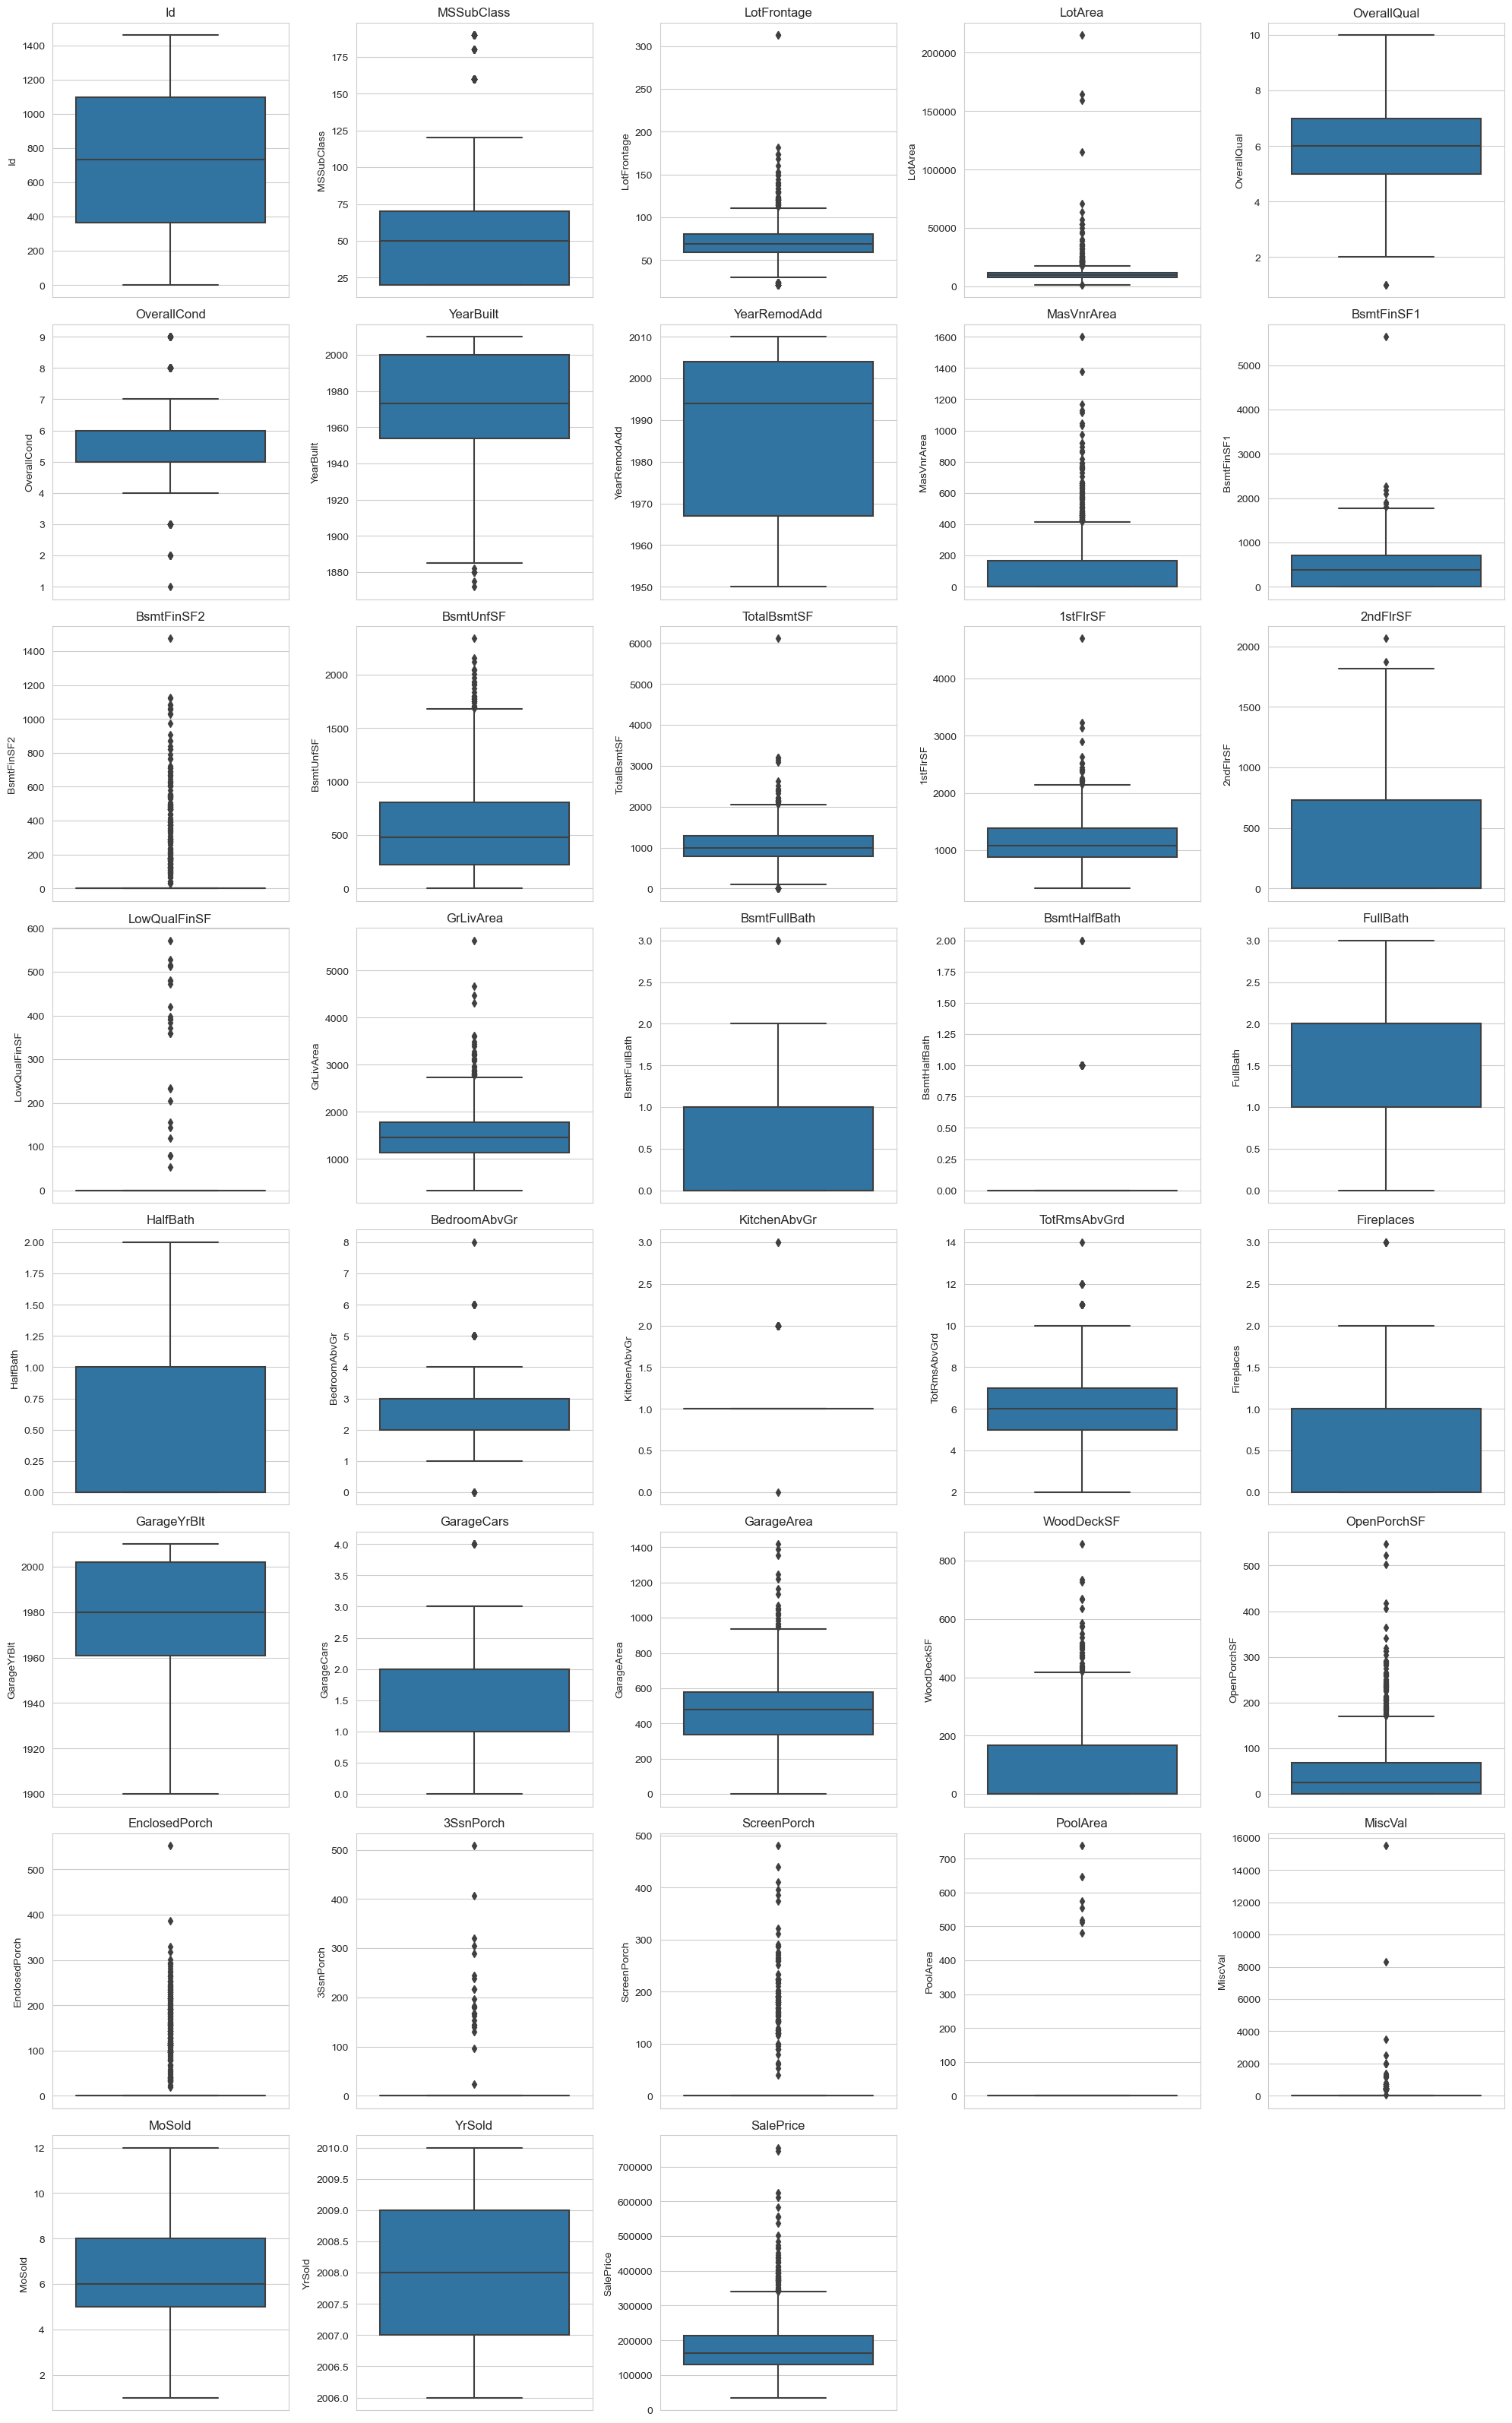

In [158]:
# Plot box plots for each numerical column
sns.set_style("whitegrid")
sns.set_style("whitegrid")

# Calculate the number of rows and columns for the subplots
numb_cols = len(numerical_cols.columns)
numb_plots_per_row = 5
numb_rows = (numb_cols // numb_plots_per_row) + (1 if numb_cols % numb_plots_per_row != 0 else 0)
plt.figure(figsize=(numb_plots_per_row * 4, numb_rows * 4))  

# Create a boxplot for each column
for i, column in enumerate(numerical_cols.columns):
    plt.subplot(numb_rows, numb_plots_per_row, i + 1) 
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()


#### Conclusion:
Following fields have more number outliers:
 ScreenPorch,BsmtFinSM2, PoolArea, MiscVal,EnclosedPorch, 3SsnPorcg, LowQualSinSF

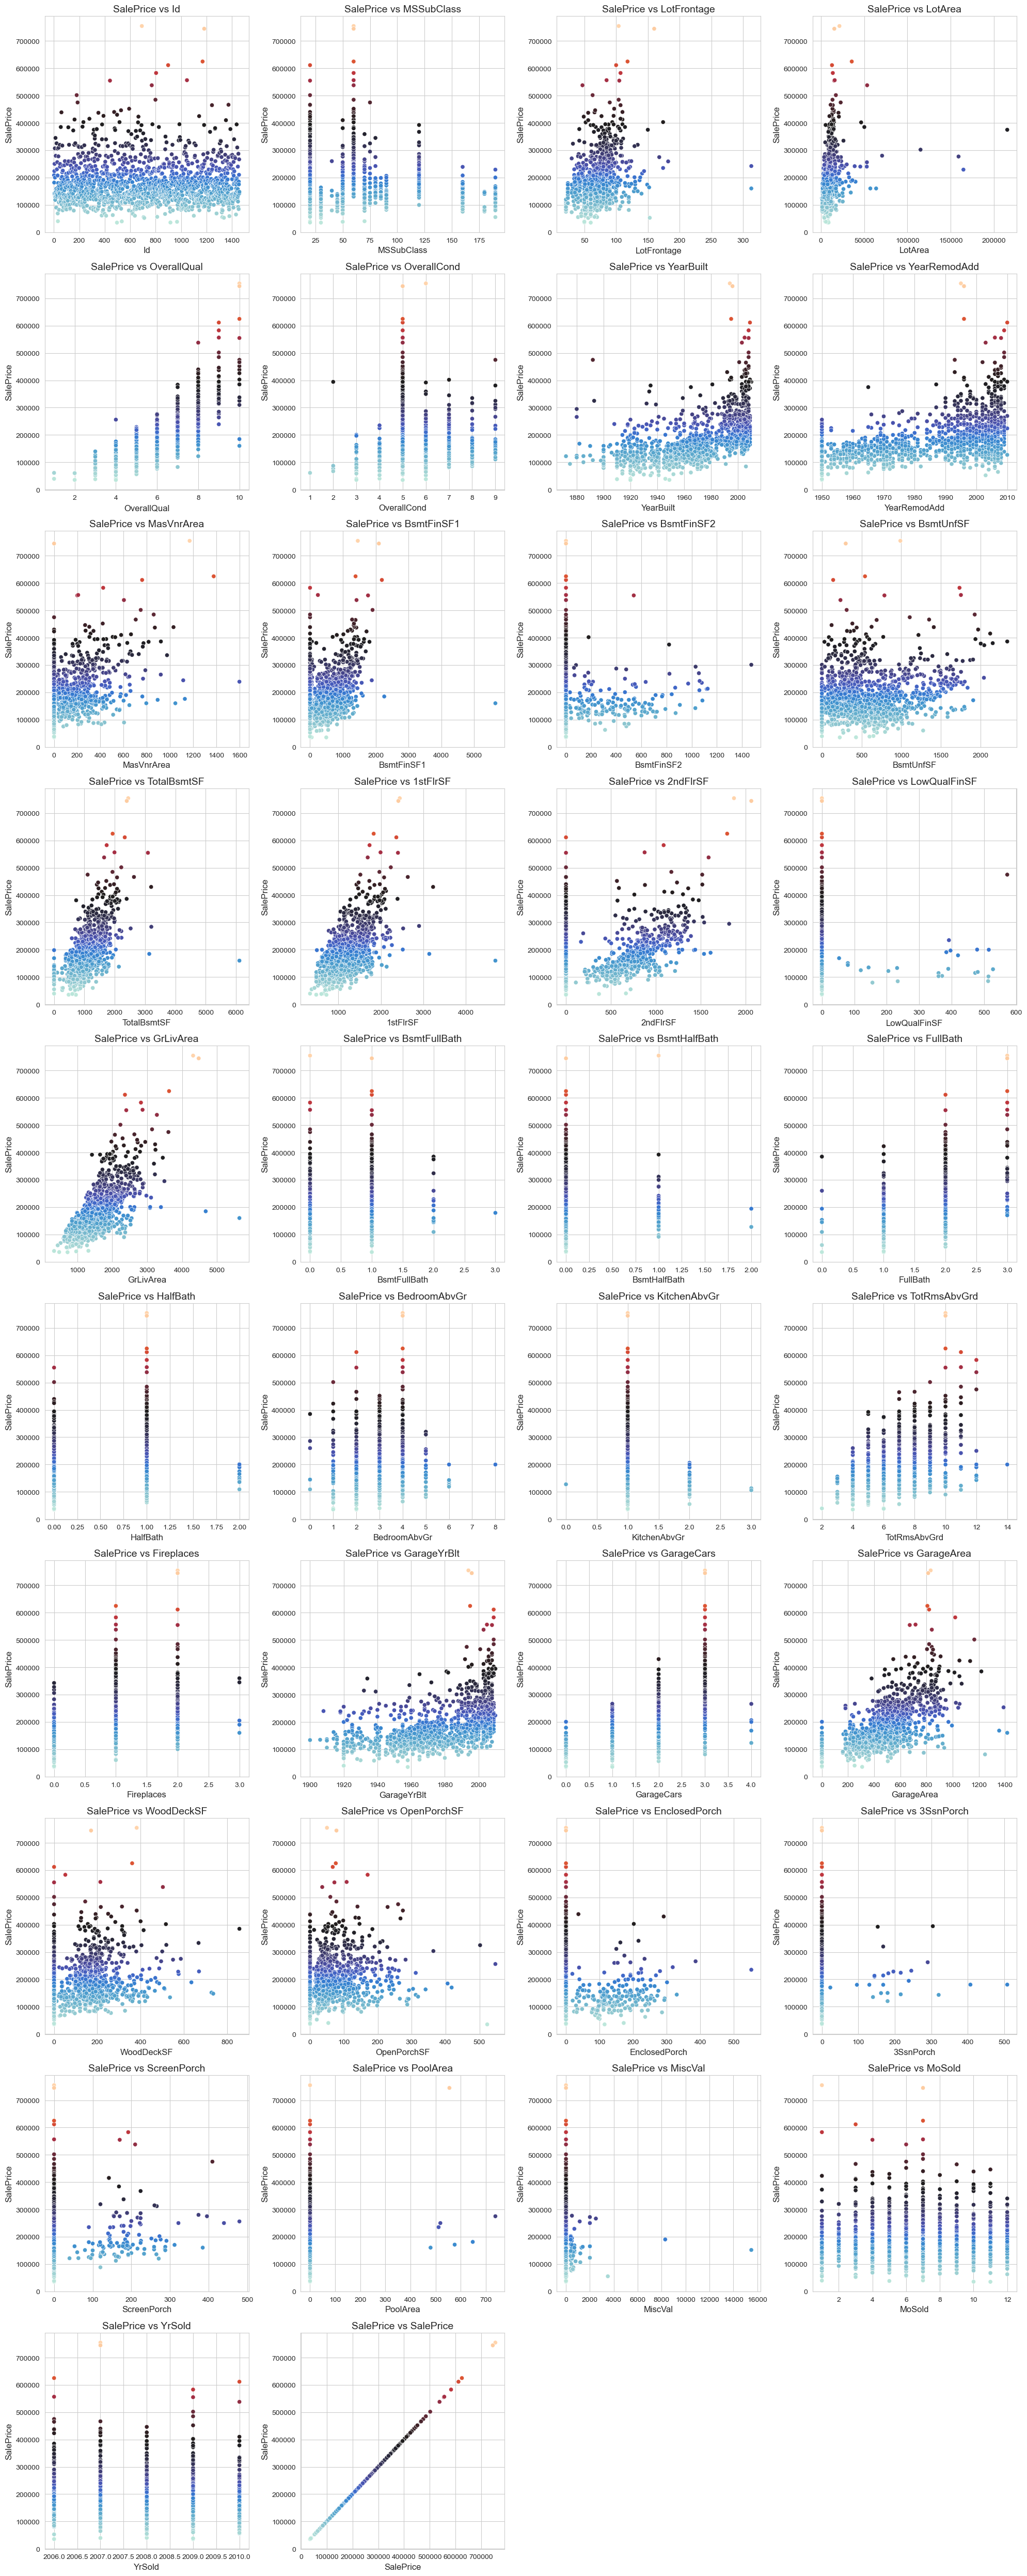

In [159]:
sns.set_style("whitegrid")

# Calculate the number of rows and columns for the subplots based on the number of numeric columns
no_cols = len(numerical_cols.columns)
no_rows = (no_cols // 4) + (1 if no_cols % 4 != 0 else 0)

# Initialize the matplotlib figure
fig, axs = plt.subplots(no_rows, 4, figsize=(20, no_rows * 5))  # Adjust the size as necessary

# Create scatter plots for each numeric column against 'SalePrice'
for i, (col, ax) in enumerate(zip(numerical_cols.columns, axs.flatten())):
    sns.scatterplot(x=col, y='SalePrice', hue='SalePrice', data=numerical_cols, ax=ax, palette='icefire', legend=False)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('SalePrice', fontsize=12)
    ax.set_title(f'SalePrice vs {col}', fontsize=14)

# Remove any empty subplots
for j in range(i + 1, len(axs.flatten())):
    fig.delaxes(axs.flatten()[j])

# Adjust layout to avoid overlap
plt.tight_layout()

# Show plot
plt.show()

SalePrice has linear relation with 1stFlrSF, GrLivArea

#### correlation matrix

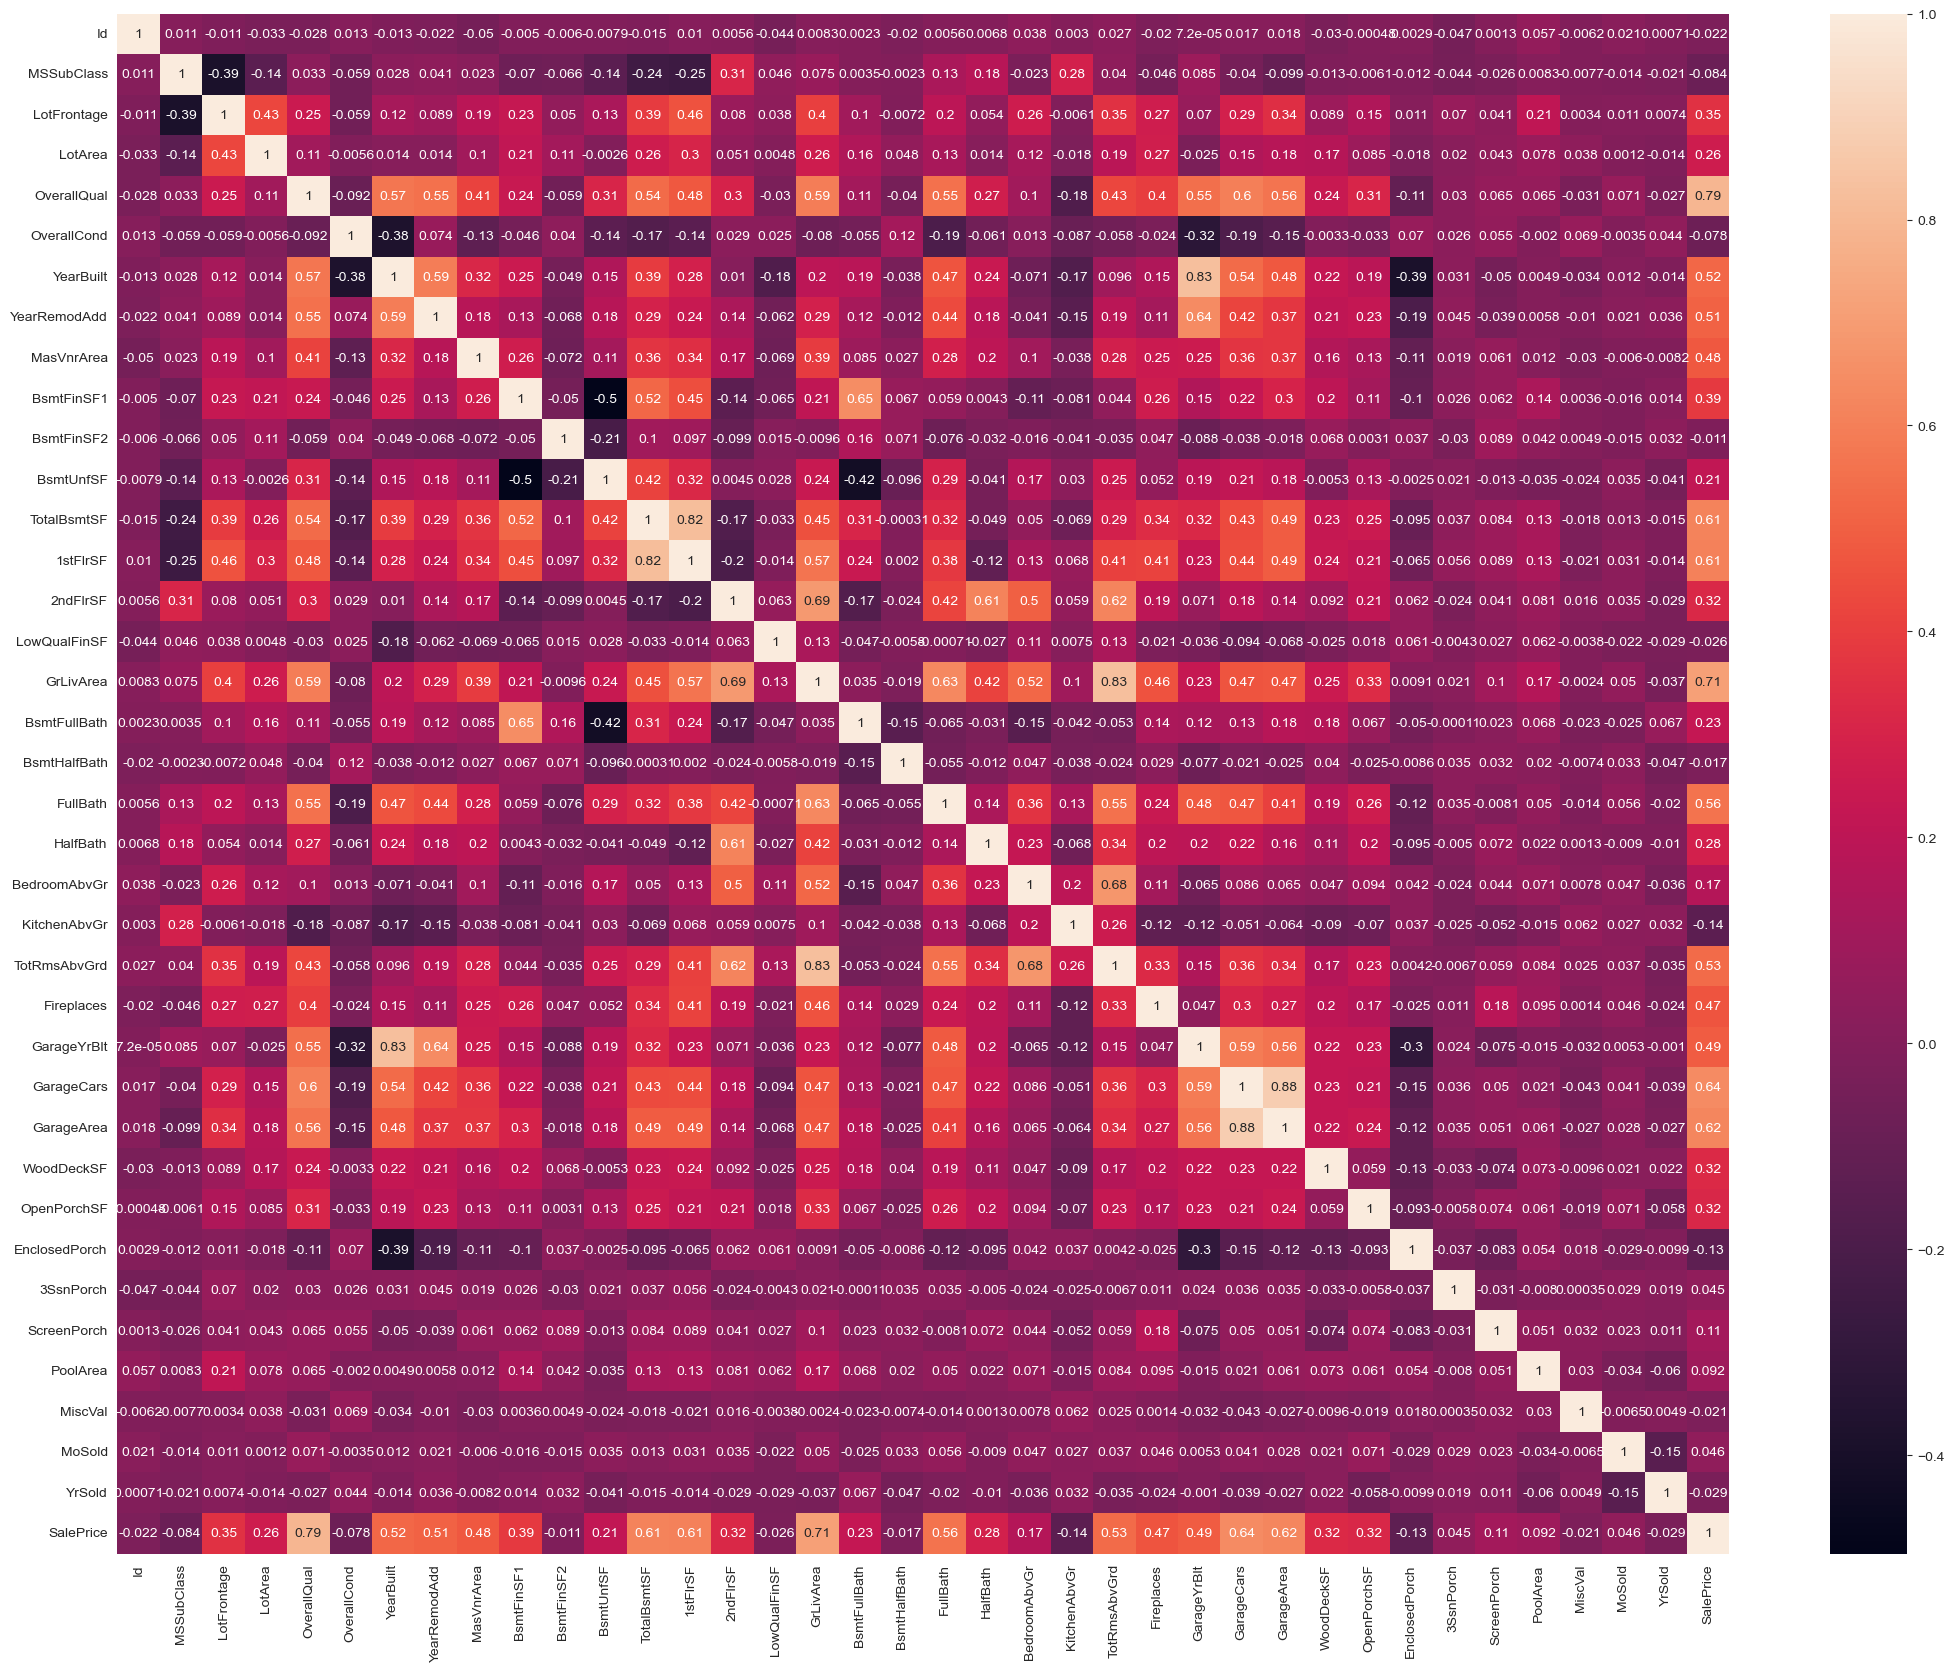

In [160]:
corr = numerical_cols.corr()
plt.figure(figsize=(26,20))
sns.heatmap(corr,  annot=True)
plt.show()

#### Note:
SalePrice is  positively correlated with OverallQual, YearBuilt, YearRemodAdd, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, GarageCars, GarageArea
SalePrice is negatively correlated with MSSubClass, OverallCond, BsmtFinSF2, LowQualFinSF, EnclosedPorch, YrSold

#### Remove columns greater than 45% null values

In [161]:
df.shape

(1460, 81)

In [163]:
columns_to_remove

Alley          93.767123
MasVnrType     59.726027
FireplaceQu    47.260274
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

In [164]:

df.drop(columns = columns_to_remove.index.tolist(), inplace=True)


In [165]:
df.shape

(1460, 75)

In [166]:
#Drop  column id as it will not much contribute to saleprice
df.drop("Id",axis=1,inplace=True)

In [175]:
## Dropping the columns as it does not add any value to SalePrice prediction

## Finding redundant features

# Trying to remove redundant features
def redundant_feature(df):
    redundant = []
    for i in df.columns:
        counts = df[i].value_counts()
        count_max = counts.iloc[0]
        if count_max / len(df) * 100 > 99:
            redundant.append(i)
    redundant = list(redundant)
    return redundant

In [176]:
redundant_features = redundant_feature(df)
redundant_features

['Street', 'Utilities', 'PoolArea']

In [179]:
df.drop(redundant_features,axis=1,inplace=True)

KeyError: "['Street', 'Utilities', 'PoolArea'] not found in axis"

In [180]:
df.shape

(1460, 71)

In [181]:
# missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(ascending=False)

Series([], dtype: int64)

In [182]:
missing_val_perc = df.isnull().sum() / len(df) * 100
missing_val_perc = missing_val_perc[missing_val_perc > 0]
missing_val_perc.sort_values(ascending=False)

Series([], dtype: float64)

In [183]:
## handle missing values

def fillMissingVal(df):
    for column in df.columns:
        if df[column].dtype == 'object': 
            df[column].fillna('None', inplace=True)
        else: 
            df[column].fillna(df[column].median(), inplace=True)
    return df

df = fillMissingVal(df)

In [184]:
missing_val_corrected =  df.isnull().sum()
missing_val_corrected = missing_val_corrected[missing_val_corrected > 0 ]
missing_val_corrected

Series([], dtype: int64)

In [190]:
# Convert categorical variables to dummy/indicator variables
df = pd.get_dummies(df, drop_first=True)

In [191]:
df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLI  \
0          2003       196.0         706           0  ...           False   
1          1976         0.0         978           0  ...           False   
2          2002       162.0         486           0  ...           False   
3          1970         0.0         216           0  ...           False   
4          2000       350.0         655           0  ...           False   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0           False         False         False         True   
1           False         False         False         True   
2           False         False         False         True   
3           False         False         False         True   
4           False         False         False         True   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                  False                 False                 False   
1                  False                 False                 False   
2                  False                 False                 False   
3                  False                 False                 False   
4                  False                 False                 False   

   SaleCondition_Normal  SaleCondition_Partial  
0                  True                  False  
1                  True                  False  
2                  True                  False  
3                 False                  False  
4                  True                  False  

[5 rows x 237 columns]

In [194]:
df.shape

(1460, 237)

In [195]:
# Define the target variable and feature variables
X = df.drop('SalePrice', axis=1)  # assuming 'Price' is the target variable
y = df['SalePrice']

In [196]:
# Apply MinMax scaling
scaler = MinMaxScaler()

In [197]:
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the scaled features
print("\nScaled features:")
print(X_scaled_df.head())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)


Scaled features:
   MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    0.235294     0.150685  0.033420     0.666667        0.500   0.949275   
1    0.000000     0.202055  0.038795     0.555556        0.875   0.753623   
2    0.235294     0.160959  0.046507     0.666667        0.500   0.934783   
3    0.294118     0.133562  0.038561     0.666667        0.500   0.311594   
4    0.235294     0.215753  0.060576     0.777778        0.500   0.927536   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLI  \
0      0.883333     0.12250    0.125089         0.0  ...             0.0   
1      0.433333     0.00000    0.173281         0.0  ...             0.0   
2      0.866667     0.10125    0.086109         0.0  ...             0.0   
3      0.333333     0.00000    0.038271         0.0  ...             0.0   
4      0.833333     0.21875    0.116052         0.0  ...             0.0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \


#### Linear Regression

In [199]:
## Build a basic Linear Regression Model
## With Recursive Feature Elimination 
lnr = LinearRegression()

lnr.fit(X_train, y_train)

rfe = RFE( lnr, n_features_to_select = 20)
rfe= rfe.fit(X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 96),
 ('LotFrontage', False, 72),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', False, 8),
 ('YearBuilt', False, 7),
 ('YearRemodAdd', False, 85),
 ('MasVnrArea', False, 21),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 24),
 ('BsmtUnfSF', False, 23),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', False, 2),
 ('LowQualFinSF', False, 26),
 ('GrLivArea', False, 20),
 ('BsmtFullBath', False, 115),
 ('BsmtHalfBath', False, 175),
 ('FullBath', False, 152),
 ('HalfBath', False, 200),
 ('BedroomAbvGr', False, 6),
 ('KitchenAbvGr', False, 5),
 ('TotRmsAbvGrd', False, 106),
 ('Fireplaces', False, 109),
 ('GarageYrBlt', False, 189),
 ('GarageCars', False, 174),
 ('GarageArea', False, 4),
 ('WoodDeckSF', False, 74),
 ('OpenPorchSF', False, 217),
 ('EnclosedPorch', False, 195),
 ('3SsnPorch', False, 103),
 ('ScreenPorch', False, 107),
 ('MiscVal', False, 198),
 ('MoSold', False, 169),
 ('YrSold', False, 202),
 ('MSZoning_FV', False,

In [201]:
rfe_fets = X_train.columns[rfe.support_]
list(rfe_fets)

['LotArea',
 'OverallQual',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 'Condition2_PosN',
 'RoofMatl_CompShg',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'GarageQual_Fa',
 'GarageQual_Gd',
 'GarageQual_Po',
 'GarageQual_TA',
 'GarageCond_Fa',
 'GarageCond_Gd',
 'GarageCond_Po',
 'GarageCond_TA']

In [202]:
drop_fets = X_train.columns[~rfe.support_].to_list
X_train_rfe=X_train[list(rfe_fets)]
lr2 = LinearRegression()
lr2.fit(X_train_rfe,y_train)
LinearRegression()
print(lr2.intercept_)
print(lr2.coef_)

-615628.2128501708
[ 189304.95919618  322021.06570604  154883.91162102   59742.18107586
  177989.37012714 -166632.53008776  544409.79309559  531659.80029253
  554744.25339924  543589.66744123  527642.57365035  514641.8959124
 -178467.46460756 -163439.27346364 -178789.09471341 -170014.95090037
  176519.11932155  180588.58635623  168411.22944486  175627.77859277]


In [203]:
## Evaluate Metrics such as R2 score, RSS and RMSE
y_pred_train = lr2.predict(X_train_rfe)
y_pred_test = lr2.predict(X_test[list(rfe_fets)])

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Train:",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Test",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Rss Train:",rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Rss Test",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE Train:",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE Test",mse_test_lr)
metric.append(mse_test_lr**0.5)

R2 Train: 0.7508107862410508
R2 Test 0.617609286605258
Rss Train: 1736000291646.8425
Rss Test 856453961018.3076
MSE Train: 1486301619.5606527
MSE Test 2933061510.33667


R2 on train dataset is 75% and R2 on test data set is 61%. we need to validate other model.

####  Ridge Regression

In [206]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

## Initialize Ridge 
ridge = Ridge()
# Perform Cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)
print(model_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 4.0}


In [207]:
# Ridge model for alpha = 4
alpha = 4
ridge = Ridge(alpha=alpha)
## Printing coefficients which have been penalised
ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.77583424e+04 -9.25565547e+03  2.08767150e+04  6.18041989e+04
  2.75277920e+04  8.27228117e+03  9.93202356e+03  1.42312753e+04
  1.55455578e+04  6.24466640e+03  1.04921136e+04  1.98777977e+04
  3.91241188e+04  5.37031956e+04  1.07798332e+04  5.41759746e+04
  2.10431288e+04 -3.54322372e+03  3.00537692e+04  1.11922225e+04
  3.63057015e+03 -1.31514099e+04  3.78450164e+04  2.21181009e+04
 -2.59829904e+03  3.50390049e+04  1.94970361e+04  1.74322519e+04
  1.66855029e+03  2.19985506e+03  1.42070539e+04  1.54526506e+04
 -2.20522352e+03 -1.41279349e+03 -1.96552686e+03  7.16173213e+03
  2.41283509e+03  4.60549490e+03  1.86398041e+03  1.13200845e+04
 -1.52980049e+04 -2.13779148e+02  2.18388928e+04  9.11179687e+03
  1.26602343e+04  1.33392830e+04 -8.63431405e+03 -8.19888962e+03
 -9.45961470e+02  6.38588667e+03  9.79718011e+03 -1.19149734e+03
  6.24246995e+02 -1.18243307e+03 -2.30418615e+03 -5.89984231e+03
  1.33327023e+04 -1.78741235e+04 -1.08278960e+04 -1.09954469e+04
 -9.92109700e+03 -1.52835

In [208]:
## Evaluate Metrics such as R2 score, RSS and RMSE

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8953506947714455
0.8695972315868342
729049310188.6343
292067677438.38354
624186053.2436937
1000231772.0492587


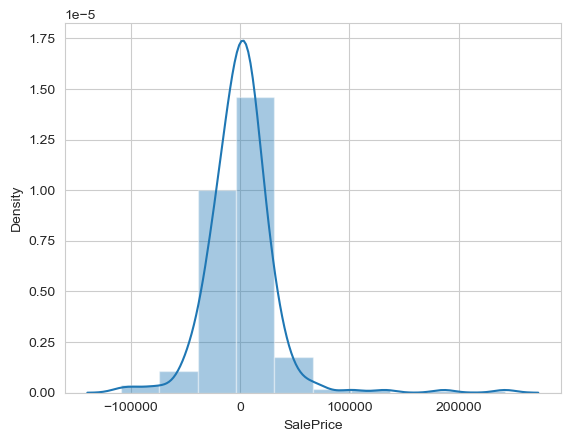

In [211]:
## Plot the Error Distribution
sns.distplot((y_test-y_pred_test), bins=10)
plt.show()

#### Lasso Regression

In [213]:
lasso = Lasso()
#$ Perform Cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [214]:
## Top hyperparameter Alpha
print(model_cv.best_params_)

{'alpha': 100}


In [215]:
## Fit Lasso model for alpha = 100
alpha =100
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
## Printing coefficients which have been penalised
lasso.coef_

array([-2.35000177e+04, -0.00000000e+00,  1.94129961e+04,  9.09506874e+04,
        2.92972288e+04,  1.17254741e+04,  8.68057060e+03,  4.47600176e+03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.26574217e+04, -0.00000000e+00,  1.88844221e+05,
        2.45718160e+04,  0.00000000e+00,  2.16341710e+04,  6.82125009e+03,
       -0.00000000e+00, -0.00000000e+00,  1.93221952e+04,  1.89259171e+04,
        0.00000000e+00,  4.50508141e+04,  0.00000000e+00,  1.58780819e+04,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  1.32589921e+04,
       -0.00000000e+00, -4.20481833e+02, -4.34483923e+02,  0.00000000e+00,
       -0.00000000e+00,  1.46364740e+03, -1.91920684e+03,  9.86599643e+03,
       -1.14386169e+04, -0.00000000e+00,  1.76432347e+04,  9.52570134e+03,
        9.45206892e+03,  1.39219332e+04, -3.28657265e+03, -0.00000000e+00,
        5.25480012e+01,  3.04707048e+03,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  

In [216]:
lasso.intercept_

16461.709347013995

In [217]:
## Evaluate Metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Train:",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Test:",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS Train:",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS Test:",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE Train:",mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE Test:",mse_test_lr)
metric3.append(mse_test_lr**0.5)

R2 Train: 0.8904165764152183
R2 Test: 0.8781308274036099
RSS Train: 763423313686.7002
RSS Test: 272954682056.97607
MSE Train: 653615850.7591611
MSE Test: 934776308.4143016


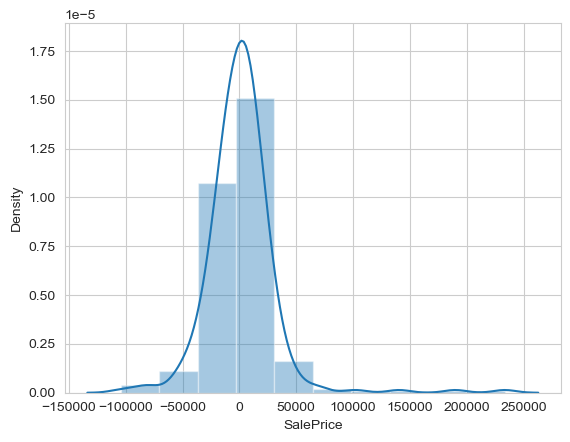

In [218]:
## Plot the Error Distribution
sns.distplot((y_test-y_pred_test), bins=10)
plt.show()

#### Output

In [219]:
import pandas as pd

# Assuming metric, metric2, and metric3 are already defined lists with the metrics

# Helper function to format the numbers
def format_numbers(x):
    return '{:.2f}'.format(x) if isinstance(x, (int, float)) else x

# Tabulate the Results for the three models that we have created
lr_table = {'Metric': ['R2 Score (Train)', 'R2 Score (Test)', 'RSS (Train)', 'RSS (Test)',
                       'MSE (Train)', 'MSE (Test)'], 
            'Linear Regression': metric}

lr_metric = pd.DataFrame(lr_table, columns=['Metric', 'Linear Regression'])

rg_metric = pd.Series(metric2, name='Ridge Regression')
ls_metric = pd.Series(metric3, name='Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis=1)

# Apply the formatting function to all numerical columns
final_metric.iloc[:, 1:] = final_metric.iloc[:, 1:].applymap(format_numbers)

# Display the final metric table
print(final_metric)


             Metric Linear Regression Ridge Regression Lasso Regression
0  R2 Score (Train)              0.75             0.90             0.89
1   R2 Score (Test)              0.62             0.87             0.88
2       RSS (Train)  1736000291646.84  729049310188.63  763423313686.70
3        RSS (Test)   856453961018.31  292067677438.38  272954682056.98
4       MSE (Train)          38552.58         24983.72         25565.91
5        MSE (Test)          54157.75         31626.44         30574.11


In [220]:
## Coeffcients and Betas
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas['Linear']= 0
betas

Ridge         Lasso  Linear
MSSubClass            -17758.342416 -23500.017692       0
LotFrontage            -9255.655472     -0.000000       0
LotArea                20876.715040  19412.996055       0
OverallQual            61804.198928  90950.687356       0
OverallCond            27527.791951  29297.228811       0
...                             ...           ...     ...
SaleCondition_AdjLand   3462.549704      0.000000       0
SaleCondition_Alloca   17070.199218   1327.680268       0
SaleCondition_Family   -2831.930918     -0.000000       0
SaleCondition_Normal    1238.521857      0.000000       0
SaleCondition_Partial   7744.555432  12004.394585       0

[236 rows x 3 columns]

In [221]:
val = 0
for x in list(X_train_rfe.columns):
    betas.loc[x,"Linear"]= lr2.coef_[val]
    val = val + 1

pd.set_option('display.max_rows', None)

betas.head(240)

Ridge          Lasso         Linear
MSSubClass            -17758.342416  -23500.017692       0.000000
LotFrontage            -9255.655472      -0.000000       0.000000
LotArea                20876.715040   19412.996055  189304.959196
OverallQual            61804.198928   90950.687356  322021.065706
OverallCond            27527.791951   29297.228811       0.000000
YearBuilt               8272.281169   11725.474086       0.000000
YearRemodAdd            9932.023565    8680.570600       0.000000
MasVnrArea             14231.275304    4476.001758       0.000000
BsmtFinSF1             15545.557829       0.000000  154883.911621
BsmtFinSF2              6244.666400       0.000000       0.000000
BsmtUnfSF              10492.113573       0.000000       0.000000
TotalBsmtSF            19877.797703       0.000000   59742.181076
1stFlrSF               39124.118762       0.000000  177989.370127
2ndFlrSF               53703.195566   22657.421661       0.000000
LowQualFinSF           10779.833227      -0.000000       0.000000
GrLivArea              54175.974569  188844.221144       0.000000
BsmtFullBath           21043.128820   24571.816008       0.000000
BsmtHalfBath           -3543.223722       0.000000       0.000000
FullBath               30053.769242   21634.171019       0.000000
HalfBath               11192.222486    6821.250088       0.000000
BedroomAbvGr            3630.570155      -0.000000       0.000000
KitchenAbvGr          -13151.409871      -0.000000       0.000000
TotRmsAbvGrd           37845.016376   19322.195250       0.000000
Fireplaces             22118.100858   18925.917097       0.000000
GarageYrBlt            -2598.299045       0.000000       0.000000
GarageCars             35039.004919   45050.814120       0.000000
GarageArea             19497.036082       0.000000       0.000000
WoodDeckSF             17432.251907   15878.081869       0.000000
OpenPorchSF             1668.550292       0.000000       0.000000
EnclosedPorch           2199.855061      -0.000000       0.000000
3SsnPorch              14207.053920       0.000000       0.000000
ScreenPorch            15452.650635   13258.992081       0.000000
MiscVal                -2205.223517      -0.000000       0.000000
MoSold                 -1412.793491    -420.481833       0.000000
YrSold                 -1965.526864    -434.483923       0.000000
MSZoning_FV             7161.732130       0.000000       0.000000
MSZoning_RH             2412.835094      -0.000000       0.000000
MSZoning_RL             4605.494895    1463.647404       0.000000
MSZoning_RM             1863.980411   -1919.206843       0.000000
LotShape_IR2           11320.084479    9865.996425       0.000000
LotShape_IR3          -15298.004940  -11438.616924       0.000000
LotShape_Reg            -213.779148      -0.000000       0.000000
LandContour_HLS        21838.892780   17643.234691       0.000000
LandContour_Low         9111.796868    9525.701341       0.000000
LandContour_Lvl        12660.234279    9452.068925       0.000000
LotConfig_CulDSac      13339.282967   13921.933168       0.000000
LotConfig_FR2          -8634.314047   -3286.572649       0.000000
LotConfig_FR3          -8198.889622      -0.000000       0.000000
LotConfig_Inside        -945.961470      52.548001       0.000000
LandSlope_Mod           6385.886672    3047.070477       0.000000
LandSlope_Sev           9797.180111       0.000000       0.000000
Neighborhood_Blueste   -1191.497342      -0.000000       0.000000
Neighborhood_BrDale      624.246995       0.000000       0.000000
Neighborhood_BrkSide   -1182.433072    1858.353484       0.000000
Neighborhood_ClearCr   -2304.186147       0.000000       0.000000
Neighborhood_CollgCr   -5899.842305      -0.000000       0.000000
Neighborhood_Crawfor   13332.702274   15496.312553       0.000000
Neighborhood_Edwards  -17874.123457  -10437.616111       0.000000
Neighborhood_Gilbert  -10827.895974   -3396.250607       0.000000
Neighborhood_IDOTRR   -10995.446853    -591.362678       0.000000
Neig

In [222]:
## Finding 20 most important featues of these models 
betas["ABSRidge"]=abs(betas["Ridge"])
betas['ABSLasso']=abs(betas["Lasso"])
betas['ABSLinear']=abs(betas['Linear'])

betas["RidgeRank"]=betas["ABSRidge"].rank()
betas["LassoRank"]=betas["ABSLasso"].rank()
betas["LinearRank"]=betas["ABSLinear"].rank()

Ridge_imp = pd.DataFrame(betas.sort_values(by="RidgeRank",ascending= False).head(20).Ridge)
Lasso_imp = pd.DataFrame(betas.sort_values(by="LassoRank",ascending= False).head(20).Lasso)
Linear_imp = pd.DataFrame(betas.sort_values(by="LinearRank",ascending= False).head(20).Linear)
out="Ridge Regression:\n("
for x in range(len(Ridge_imp)):
    out=out+str(Ridge_imp.index[x])+"*"+str(round(Ridge_imp['Ridge'][x],3))+")"
    if x!=len(Ridge_imp)-1:
        out=out+"\n("
        
print(out)

Ridge Regression:
(OverallQual*61804.199)
(GrLivArea*54175.975)
(2ndFlrSF*53703.196)
(Neighborhood_StoneBr*39851.843)
(1stFlrSF*39124.119)
(Condition2_PosN*-38763.49)
(Neighborhood_NoRidge*38088.614)
(TotRmsAbvGrd*37845.016)
(GarageCars*35039.005)
(RoofMatl_WdShngl*34774.873)
(Exterior2nd_ImStucc*30827.41)
(FullBath*30053.769)
(OverallCond*27527.792)
(KitchenQual_TA*-27238.514)
(BsmtQual_TA*-27159.958)
(Neighborhood_NridgHt*26407.756)
(KitchenQual_Gd*-25893.992)
(BsmtQual_Gd*-25735.89)
(Fireplaces*22118.101)
(LandContour_HLS*21838.893)


In [223]:
out="Lasso Regression:\n("
for x in range(len(Lasso_imp)):
    out=out+Lasso_imp.index[x]+"*"+str(round(Lasso_imp['Lasso'][x],3))+")"
    if x!=len(Lasso_imp)-1:
        out=out+"\n("
        
print(out)

Lasso Regression:
(GrLivArea*188844.221)
(OverallQual*90950.687)
(Condition2_PosN*-79562.672)
(GarageCars*45050.814)
(Neighborhood_StoneBr*43407.598)
(Neighborhood_NoRidge*41207.438)
(Neighborhood_NridgHt*32151.379)
(OverallCond*29297.229)
(Exterior2nd_ImStucc*27377.707)
(RoofMatl_WdShngl*27165.803)
(KitchenQual_TA*-26411.872)
(KitchenQual_Gd*-25293.033)
(BsmtFullBath*24571.816)
(MSSubClass*-23500.018)
(2ndFlrSF*22657.422)
(BsmtQual_Gd*-21949.233)
(BsmtQual_TA*-21881.211)
(Exterior1st_BrkFace*21704.454)
(FullBath*21634.171)
(BsmtExposure_Gd*19912.584)


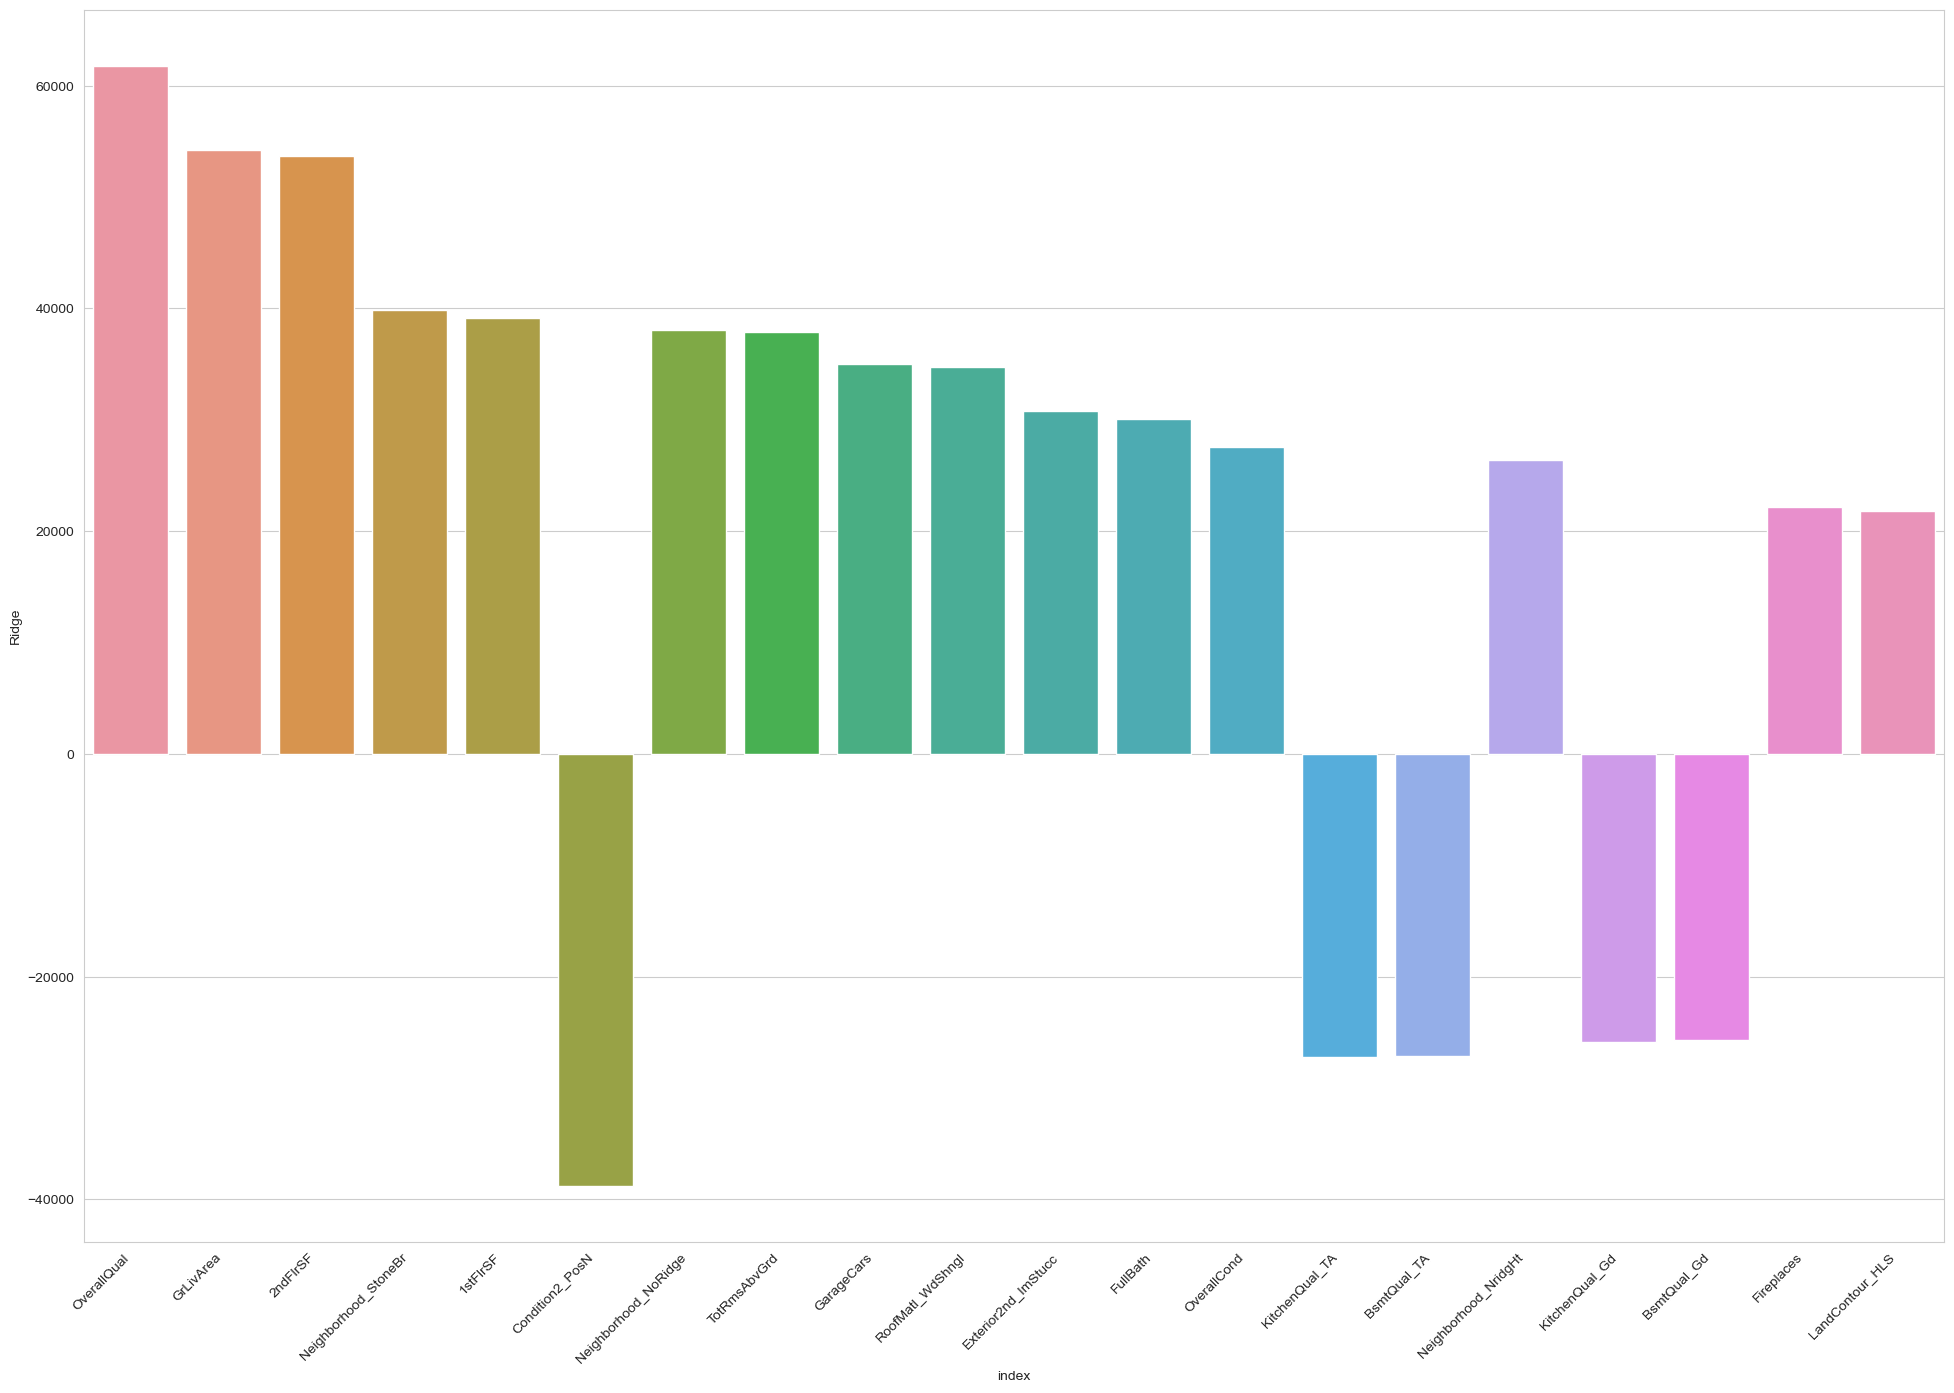

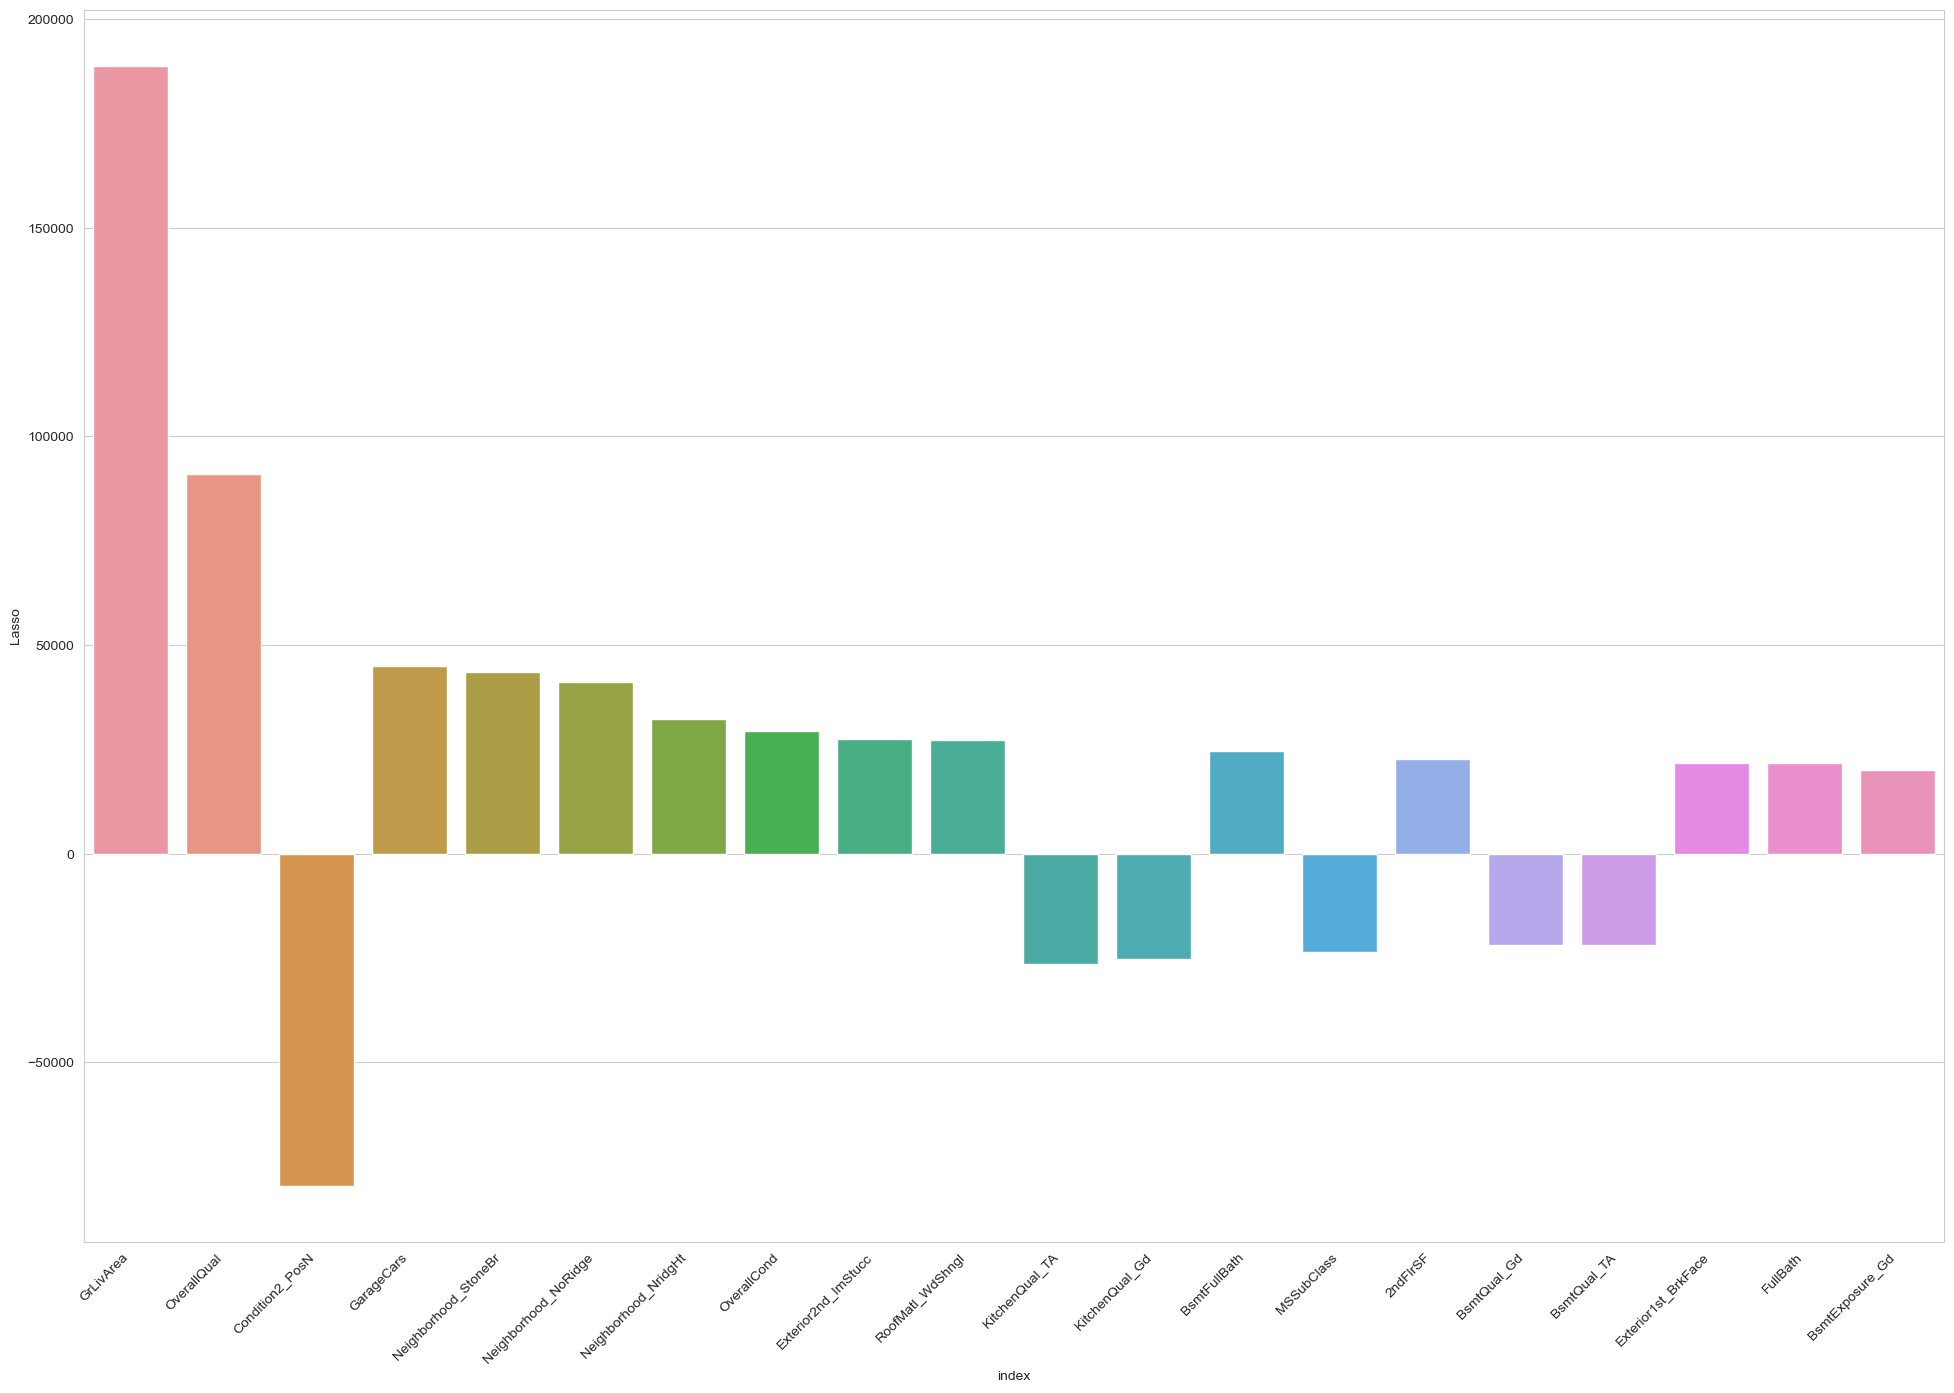

In [224]:
# Drop the existing index column if it already exists
if 'level_0' in Ridge_imp.columns:
    Ridge_imp = Ridge_imp.drop(columns=['level_0'])
if 'level_0' in Lasso_imp.columns:
    Lasso_imp = Lasso_imp.drop(columns=['level_0'])

# Reset index
Ridge_imp = Ridge_imp.reset_index()

# Create the plot for Ridge
plt.figure(figsize=(24,16))
sns.barplot(x="index", y="Ridge", data=Ridge_imp)

# Rotate the x-axis labels to prevent overlapping
plt.xticks(rotation=45, ha='right')
plt.show()

# Drop the existing index column if it already exists
if 'level_0' in Lasso_imp.columns:
    Lasso_imp = Lasso_imp.drop(columns=['level_0'])

# Reset index
Lasso_imp = Lasso_imp.reset_index()

# Create the plot for Lasso
plt.figure(figsize=(24,16))
sns.barplot(x="index", y="Lasso", data=Lasso_imp)

# Rotate the x-axis labels to prevent overlapping
plt.xticks(rotation=45, ha='right')
plt.show()


 What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [229]:
# Define the parameter grid
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

# Ridge regression with cross-validation
ridge = Ridge()
ridge_cv = GridSearchCV(estimator=ridge, param_grid=params, scoring='neg_mean_absolute_error', cv=5, return_train_score=True, verbose=1)
ridge_cv.fit(X_train, y_train)
ridge_best_alpha = ridge_cv.best_params_['alpha']

# Lasso regression with cross-validation
lasso = Lasso()
lasso_cv = GridSearchCV(estimator=lasso, param_grid=params, scoring='neg_mean_absolute_error', cv=5, return_train_score=True, verbose=1)
lasso_cv.fit(X_train, y_train)
lasso_best_alpha = lasso_cv.best_params_['alpha']

print(f"Optimal alpha for Ridge: {ridge_best_alpha}")
print(f"Optimal alpha for Lasso: {lasso_best_alpha}")

# Train models with doubled alpha values
ridge_double_alpha = Ridge(alpha=2 * ridge_best_alpha)
ridge_double_alpha.fit(X_train, y_train)
ridge_double_alpha_coef = pd.Series(ridge_double_alpha.coef_, index=X_train.columns)

lasso_double_alpha = Lasso(alpha=2 * lasso_best_alpha)
lasso_double_alpha.fit(X_train, y_train)
lasso_double_alpha_coef = pd.Series(lasso_double_alpha.coef_, index=X_train.columns)

print("Most important variables on doubling alpha for Ridge:")
print(ridge_double_alpha_coef.sort_values(ascending=False).head(10))

print("Most important variables on doubling alpha for Lasso:")
print(lasso_double_alpha_coef.sort_values(ascending=False).head(10))

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Optimal alpha for Ridge: 4.0
Optimal alpha for Lasso: 100
Most important variables on doubling alpha for Ridge:
OverallQual             54290.650332
GrLivArea               43647.780360
2ndFlrSF                43169.109739
TotRmsAbvGrd            36058.232078
Neighborhood_NoRidge    35183.266540
Neighborhood_StoneBr    34020.779712
GarageCars              32228.499555
1stFlrSF                31705.653374
FullBath                29369.293058
Neighborhood_NridgHt    24634.891544
dtype: float64
Most important variables on doubling alpha for Lasso:
GrLivArea               172398.097251
OverallQual             100772.757649
GarageCars               46381.228461
Neighborhood_NoRidge     40344.906036
Neighborhood_StoneBr     37426.596004
Neighborhood_NridgHt     31060.237171
TotRmsAbvGrd             24429.253459
BsmtFullBath             23555.913715
Fireplaces           